<a href="https://colab.research.google.com/github/MarigoldJ/ygl2/blob/main/class/20210624_nlp_day8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한-영 번역기 만들기

한-영 번역기 만들기
1. 데이터 다운로드
- 데이터 : https://github.com/jungyeul/korean-parallel-corpora/tree/master/korean-english-news-v1
- korean-english-park.train.tar.gz
2. 데이터 정제
- set 데이터형이 중복이 허용하지 않다는 것을 활용해 중복된 데이터를 제거
  - 데이터 병렬 쌍이 흐트러지지 않게 주의!
  - cleaned_corpus에 저장
- 앞서 정의한 preprocessing()함수는 한글에 대해 동작하지 않아요.
  - 한글에 적용할 수 있는 정규식을 추가해여 함수를 재정의 하세요.
- 타겟 언어인 영문엔 <start>토큰과 <end>토큰을 추가하고 split()함수로 토큰화 합니다. 한글 토큰화는 konlpy의 mecab클래스를 사용합니다.
  - cleaned_corpus로부터 토큰의길이가 40이하인 데이터를 선별하여 eng_corpus와 kor_corpus를 각각 구축하기

3. 토큰화
- tokenize()함수를 사용해 데이터를 텐서로 변환하고 각각의 tokenizer를 얻으세요!
  - 단어수는 실험을 통해 적당한 값을 맞춰줍시다(최소 10000이상!)
4. 훈련하기

## Download files and install packages

In [2]:
# Download Datasets
! mkdir dataset
! wget -NP ./dataset https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
! wget -NP ./dataset https://github.com/MarigoldJ/ygl2/raw/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/NLP/dataset/korean-english-park.train.en
! wget -NP ./dataset https://github.com/MarigoldJ/ygl2/raw/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/NLP/dataset/korean-english-park.train.ko

dir_dataset = './dataset'
path_to_file_1 = dir_dataset + '/korean-english-park.train.ko'
path_to_file_2 = dir_dataset + '/korean-english-park.train.en'

--2021-06-24 06:16:05--  https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz [following]
--2021-06-24 06:16:05--  https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8718893 (8.3M) [application/octet-stream]
Saving to: ‘./dataset/korean-english-park.train.tar.gz’



In [3]:
# Install konlpy
! pip install konlpy

# Download Mecab file for konlpy
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
! bash Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab190912.sh

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 12.2MB/s 
     |████████████████████████████████| 450kB 44.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-06-24 06:16:17--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c3:9b0a, 2406:da00:ff00::6b17:d1f5, ...
Connecting to bitbucket.org (bitbucke

In [4]:
! sudo apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 161068 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [5]:
import tensorflow as tf
import numpy as np

from konlpy.tag import Mecab
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [25]:
with open(path_to_file_1, 'r') as f:
    train_raw = f.read().splitlines()

print('Train Data Size :', len(train_raw))
print('Train_raw :', train_raw[:3])

Train Data Size : 94123
Train_raw : ['개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"', '모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.', '그러나 이것은 또한 책상도 필요로 하지 않는다.']


In [26]:
with open(path_to_file_2, 'r') as f:
    target_raw = f.read().splitlines()

print('Target Data Size :', len(target_raw))
print('Target_raw :', target_raw[:3])

Target Data Size : 94123
Target_raw : ['Much of personal computing is about "can you top this?"', 'so a mention a few weeks ago about a rechargeable wireless optical mouse brought in another rechargeable, wireless mouse.', "Like all optical mice, But it also doesn't need a desk."]


In [31]:
cleaned_corpus = set(zip(train_raw, target_raw))
print(len(cleaned_corpus))
q, r = len(set(train_raw)), len(set(target_raw))
print(q, r)

78968
77591 75598


In [30]:
# 중복을 제거한 target set 크기에 맞춰서 train set 중복제거
train_dic = {}
for i, j in enumerate(train_raw):
  train_dic[i] =j
target_dic = {}
for i, j in enumerate(target_raw):
  target_dic[i] = j

target_unique_dic = {}
for i, j in target_dic.items():
  if j not in target_unique_dic.values():
    target_unique_dic[i] = j
train_unique_dic = {}
for i, j in train_dic.items():
  if i in target_unique_dic.keys():
    train_unique_dic[i] = j

print(len(train_unique_dic), len(target_unique_dic))

75598 75598


## Preprocessing

In [32]:
mecab = Mecab()

In [47]:
# def preprocess_sentence(train_unique_dic, target_unique_dic):

#     cleaned_eng_corpus = {}
#     cleaned_kor_corpus = {}

#     for idx, sentence in target_unique_dic.items():
#         new_sentence = re.sub(r'([.,?!])', r ' \1 ', sentence)
#         new_sentence = re.sub(r'[" "]+', ' ', new_sentence)
#         new_sentence = re.sub(r'[^a-zA-Z0-9.,?!]+', ' ', new_sentence)
#         new_sentence = new_sentence.strip()

#         sentence_list = new_sentence.split()
#         if len(sentence_list) <= 48:
#             new_sentence = '<start>' + new_sentence
#             new_sentence = new_sentence + '<end>'
#             new_sentence = 

#         cleaned_eng_corpus.append(new_sentence)

#     for idx, sentence in train_unique_dic.items():
#         new_sentence = re.sub(r' ', r ' ', sentence)
#         cleaned_kor_corpus.append(new_sentence)
    
#     return cleaned_eng_corpus, cleaned_kor_corpus

def preprocess_sentence(train_unique_dic, target_unique_dic):
    cleaned_eng_corpus = {}
    cleaned_kor_corpus = {}
  
    for idx, sentence in target_unique_dic.items():
        sentence = re.sub(r"([?,!,])", r" \1 ", sentence)
        sentence = re.sub(r'[" "]+', " ", sentence)
        sentence = re.sub(r"[^a-zA-Z0-9?.!,]+", " ", sentence)
        sentence = sentence.strip()
        sentence_list = sentence.split()
        if len(sentence_list) <= 48:
            sentence = '<start> ' + sentence
            sentence += ' <end>'
            sentence = sentence.split()
            cleaned_eng_corpus[idx] = sentence

    for idx, sentence in train_unique_dic.items():
        sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
        sentence = re.sub(r'[" "]+', " ", sentence)
        sentence = re.sub(r"[^ㄱ-ㅎ가-힣0-9.,?!]+", " ", sentence)
        result = mecab.morphs(sentence)
        if len(result) <= 50:
            cleaned_kor_corpus[idx] = result

    return cleaned_eng_corpus, cleaned_kor_corpus

In [48]:
cleaned_eng_corpus, cleaned_kor_corpus = preprocess_sentence(train_unique_dic, target_unique_dic)
print(cleaned_eng_corpus[100], cleaned_kor_corpus[100])

['<start>', 'Gates', ',', 'who', 'opened', 'the', '23rd', 'annual', 'Comdex', 'trade', 'show', ',', 'said', 'there', 'was', 'a', 'negative', 'perception', 'of', 'high', 'tech', 'following', 'the', 'collapse', 'of', 'the', 'tech', 'bubble', 'about', 'two', 'years', 'ago.', '<end>'] ['제', '23', '차', '연례', '컴덱스', '박람회', '의', '개회사', '를', '한', '케이츠', '는', '2', '년', '여전', '기술', '산업', '의', '거품', '이', '붕괴', '된', '이후', '에', '첨단', '기술', '에', '대해', '부정', '적', '인', '인식', '이', '있', '다고', '말', '했', '다', '.']


In [49]:
print(len(cleaned_eng_corpus), len(cleaned_kor_corpus))

74008 71573


In [50]:
set_temp1 = set(cleaned_eng_corpus.keys())
set_temp2 = set(cleaned_kor_corpus.keys())
set_temp3 = set_temp2.intersection(set_temp1)
len(set_temp3)

70791

In [51]:
train_list = []
target_list = []

for i, j in cleaned_eng_corpus.items():
    if i in set_temp3:
        target_list.append(j)

for i, j in cleaned_kor_corpus.items():
    if i in set_temp3:
        train_list.append(j)

print(len(train_list), len(target_list))


70791 70791


In [ ]:
# 안쓰는 변수 메모리 용량 차지하지 않게끔 지우기
del q
del r
del train_dic
del target_dic
del train_unique_dic
del target_unique_dic
del cleaned_eng_corpus
del cleaned_kor_corpus
del set_temp1
del set_temp2
del set_temp3

In [52]:
def tokenize(corpus):

    maxlen = 50

    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='', num_words=20000)
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)
    tensor_pad = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post', maxlen=maxlen)

    return tensor_pad, tokenizer

In [53]:
encode_tensor, encode_vocab = tokenize(train_list)
decode_tensor, decode_vocab = tokenize(target_list)

print('Korean vocab size :', len(encode_vocab.index_word))
print('English vocab size :', len(decode_vocab.index_word))

Korean vocab size : 41856
English vocab size : 56144


In [ ]:
print()

## Design Model

In [55]:
class BahdanauAttention(tf.keras.layers.Layer):

    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_decode = tf.keras.layers.Dense(units)
        self.w_encode = tf.keras.layers.Dense(units)
        self.w_combine = tf.keras.layers.Dense(1)
    
    def call(self, h_encode, h_decode):
        '''
        h_encode : (batch, length, units)
        h_decode : (batch, units)
        '''
        wh_encode = self.w_encode(h_encode)
        wh_decode = self.w_decode(tf.expand_dims(h_decode, 1))

        # attention score
        at_score = self.w_combine(tf.nn.tanh(wh_decode + wh_encode))

        # attention distribution(weight)
        at_weight = tf.nn.softmax(at_score, axis=1)

        # context vector
        context_v = at_weight * wh_encode
        context_v = tf.reduce_sum(context_v, axis=1)

        return context_v, at_weight


class Encoder(tf.keras.Model):
    
    def __init__(self, vocab_size, embedding_dim, encode_units):
        super(Encoder, self).__init__()
        self.encode_units = encode_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(encode_units, return_sequences=True)
        # return_sequences=True : 3차원 돌려줌

    def call(self, encode_input):

        embedded_input = self.embedding(encode_input)
        encode_output = self.gru(embedded_input)

        # shape 디버깅
        # print('input shape :', encode_input.shape)
        # print('after embedding ->', embedded_input.shape)
        # print('after lstm ->', encode_output.shape)

        return encode_output


class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, decode_units):
        super(Decoder, self).__init__()
        self.decode_units = decode_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(decode_units, return_sequences=True, return_state=True)
        self.attention = BahdanauAttention(self.decode_units)
        self.fc = tf.keras.layers.Dense(vocab_size)

    def call(self, decode_input, h_decode, encode_output):
        
        context_v, at_weight = self.attention(encode_output, h_decode)

        embedded_input = self.embedding(decode_input)

        v = tf.concat([tf.expand_dims(context_v, 1), embedded_input], axis=-1)

        decode_output, h_decode = self.gru(v)

        text_output = self.fc(tf.reshape(decode_output, (-1, decode_output.shape[2])))

        return text_output, h_decode, at_weight



In [57]:
batch_size = 48
src_vocab_size = len(encode_vocab.index_word) + 1
tgt_vocab_size = len(decode_vocab.index_word) + 1

units = 128
embedding_dim = 128

encoder = Encoder(src_vocab_size, embedding_dim, units)
decoder = Decoder(tgt_vocab_size, embedding_dim, units)

In [59]:
sequence_len = 50

sample_encode = tf.random.uniform((batch_size, sequence_len))
sample_output = encoder(sample_encode)
print('Encoder output :', sample_output.shape)

sample_state = tf.random.uniform((batch_size, units))
sample_logits, h_decode, at_weight = decoder(tf.random.uniform((batch_size, 1)),
                                             sample_state, sample_output)

print('Decoder output :', sample_logits.shape)
print('Decoder hidden state :', h_decode.shape)
print('Attention :', at_weight.shape)

Encoder output : (48, 50, 128)
Decoder output : (48, 56145)
Decoder hidden state : (48, 128)
Attention : (48, 50, 1)


In [63]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask

    return tf.reduce_mean(loss)

In [67]:
@tf.function
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    bsz = src.shape[0]  # batch size
    loss = 0

    with tf.GradientTape() as tape:
        encode_output = encoder(src)
        h_decode = encode_output[:, -1]

        decode_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)
        
        for t in range(1, tgt.shape[1]):
            pred, h_decode, _ = decoder(decode_src, h_decode, encode_output)

            loss += loss_function(tgt[:, t], pred)
            decode_src = tf.expand_dims(tgt[:, t], 1)

    batch_loss = (loss / int(tgt.shape[1]))
    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))

    return batch_loss

## Train Model

In [68]:
from tqdm.notebook import tqdm
import random

epochs = 15

for epoch in range(epochs):
    total_loss = 0
    idx_list = list(range(0, encode_tensor.shape[0], batch_size))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(encode_tensor[idx:idx+batch_size],
                                decode_tensor[idx:idx+batch_size],
                                encoder,
                                decoder,
                                optimizer,
                                decode_vocab)
        total_loss += batch_loss

        t.set_description_str('Epoch %2d' % (epoch+1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch+1)))

## 제목

In [1]:
def preprocess_sentence2(sentence):
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^ㄱ-ㅎ가-힣0-9.,?!]+", " ", sentence)
    result = mecab.morphs(sentence)

    return result


def evaluate(sentence, encoder, decoder):
    attention = np.zeros((decode_tensor.shape[-1], encode_tensor.shape[-1]))
    sentence_pp = preprocess_sentence2(sentence)

    inputs = encode_vocab.texts_to_sequences([sentence_pp])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                           maxlen=encode_tensor.shape[-1],
                                                           padding='post')
    result = ''
    encode_output = encoder(inputs)
    h_decode = encode_output[:, -1]
    decode_input = tf.expand_dims([decode_vocab.word_index['<start>']], 0)

    for t in range(decode_tensor.shape[-1]):
        predictions, h_decode, at_weights = decoder(decode_input,
                                                    h_decode,
                                                    encode_output)
        at_weights = tf.reshape(at_weights, (-1,))
        attention[t] = at_weights.numpy()

        predicted_id = W
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()

        result += decode_vocab.index_word[predicted_id]

        if decode_vocab.index_word[predicted_id] == '<end>':
            return result, sentence_pp, attention
        
        decode_input = tf.expand_dims([predicted_id], 0)
    
    return result, sentence_pp, attention


def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontidct = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def translate(sentence, encoder, decoder):
    result, sentence, attention = evaluate(sentence, encoder, decoder)

    print('Input:', sentence)
    print('Predicted translation :', result)

    attention = attention[:len(result), :len(sentence)]
    plot_attention(attention, sentence, result.split(' '))

In [ ]:
# 번역 잘되는지 확인
translate('')   # 런타임 이슈로 못함...ㅠㅠ

# Tagging Task

## 

In [7]:
import nltk
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [8]:
nltk.download('treebank')
tagged_sentences = nltk.corpus.treebank.tagged_sents()

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


In [9]:
print('품사 태깅이 된 문장 개수 :', len(tagged_sentences))

품사 태깅이 된 문장 개수 : 3914


In [10]:
print(tagged_sentences[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


In [12]:
sentences, pos_tags = [], []
for tagged_sentence in tagged_sentences:
    sentence, tag_info = zip(*tagged_sentence)
    sentences.append(list(sentence))
    pos_tags.append(list(tag_info))

In [14]:
print(sentences[0])
print(pos_tags[0])

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.']


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


샘플의 최대 길이 : 271
샘플의 평균 길이 : 25.722023505365357


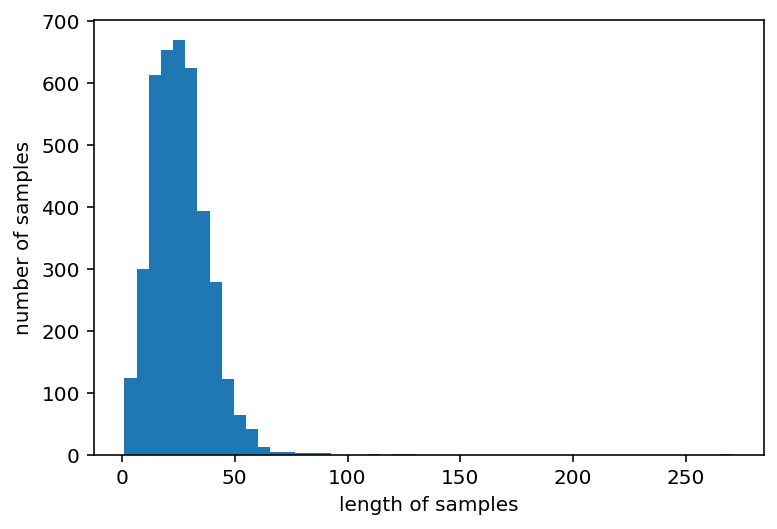

In [16]:
print('샘플의 최대 길이 :', max(len(l) for l in sentences))
print('샘플의 평균 길이 :', sum(map(len, sentences)) / len(sentences))

plt.hist([len(s) for s in sentences], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [17]:
def tokenize(samples):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(samples)
    return tokenizer


In [18]:
src_tokenizer = tokenize(sentences)
tgt_tokenizer = tokenize(pos_tags)

In [19]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tgt_tokenizer.word_index) + 1

print('단어 집합의 크기 :', vocab_size)
print('태깅 정보 집합의 크기 :', tag_size)

단어 집합의 크기 : 11388
태깅 정보 집합의 크기 : 47


In [23]:
x_encode = src_tokenizer.texts_to_sequences(sentences)
y_encode = tgt_tokenizer.texts_to_sequences(pos_tags)

In [24]:
print(x_encode[:2])
print(y_encode[:2])

[[5601, 3746, 1, 2024, 86, 331, 1, 46, 2405, 2, 131, 27, 6, 2025, 332, 459, 2026, 3], [31, 3746, 20, 177, 4, 5602, 2915, 1, 2, 2916, 637, 147, 3]]
[[3, 3, 8, 10, 6, 7, 8, 21, 13, 4, 1, 2, 4, 7, 1, 3, 10, 9], [3, 3, 17, 1, 2, 3, 3, 8, 4, 3, 19, 1, 9]]


In [25]:
max_len = 150
x = pad_sequences(x_encode, padding='post', maxlen=max_len)
y = pad_sequences(y_encode, padding='post', maxlen=max_len)

In [26]:
# split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=777)


In [27]:
# 원-핫 인코딩 수행
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [28]:
# 각 데이터에 대한 크기
print('훈련 샘플 문장의 크기 :', x_train.shape)
print('훈련 샘플 레이블의 크기 :', y_train.shape)
print('테스트 샘플 문장의 크기 :', x_test.shape)
print('테스트 샘플 레이블의 크기 :', y_test.shape)

훈련 샘플 문장의 크기 : (3131, 150)
훈련 샘플 레이블의 크기 : (3131, 150, 47)
테스트 샘플 문장의 크기 : (783, 150)
테스트 샘플 레이블의 크기 : (783, 150, 47)


In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from keras.optimizers import Adam

In [30]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation=('softmax'))))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 128)          1457664   
_________________________________________________________________
bidirectional (Bidirectional (None, 150, 512)          788480    
_________________________________________________________________
time_distributed (TimeDistri (None, 150, 47)           24111     
Total params: 2,270,255
Trainable params: 2,270,255
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(x_train, y_train, batch_size=128, epochs=6, validation_data=(x_test, y_test))

Epoch 1/6
25/25 [==============================] - 30s 150ms/step - loss: 0.6157 - accuracy: 0.1177 - val_loss: 0.5064 - val_accuracy: 0.1823
Epoch 2/6
25/25 [==============================] - 1s 45ms/step - loss: 0.4971 - accuracy: 0.2084 - val_loss: 0.4573 - val_accuracy: 0.3589
Epoch 3/6
25/25 [==============================] - 1s 46ms/step - loss: 0.4319 - accuracy: 0.4071 - val_loss: 0.3191 - val_accuracy: 0.5224
Epoch 4/6
25/25 [==============================] - 1s 46ms/step - loss: 0.2841 - accuracy: 0.5748 - val_loss: 0.1918 - val_accuracy: 0.7277
Epoch 5/6
25/25 [==============================] - 1s 48ms/step - loss: 0.1621 - accuracy: 0.7836 - val_loss: 0.1078 - val_accuracy: 0.8566
Epoch 6/6
25/25 [==============================] - 1s 45ms/step - loss: 0.0824 - accuracy: 0.8991 - val_loss: 0.0692 - val_accuracy: 0.8989


In [33]:
print('\n테스트 정확도 :', model.evaluate(x_test, y_test)[1])

25/25 [==============================] - 0s 8ms/step - loss: 0.0692 - accuracy: 0.8989

테스트 정확도 : 0.8989123106002808


In [35]:
index_to_word = src_tokenizer.index_word
index_to_tag = tgt_tokenizer.index_word

i = 10  # 확인하고 싶은 인덱스
y_predicted = model.predict(np.array([x_test[i]]))
y_predicted = np.argmax(y_predicted, axis=-1)   # 원-핫 인코딩을 다시 정수 인코딩으로 변경
true = np.argmax(y_test[i], -1)                 # 원-핫 인코딩을 다시 정수 인코딩으로 변경

print('{:15}|{:5}|{}'.format('단어', '실제값', '예측값'))
print('-' * 35)

for w, t, pred in zip(x_test[i], true, y_predicted[0]):
    if w != 0:
        print('{:17}: {:7} {}'.format(index_to_word[w], index_to_tag[t].upper(), index_to_tag[pred].upper()))


단어             |실제값  |예측값
-----------------------------------
in               : IN      IN
addition         : NN      NN
,                : ,       ,
buick            : NNP     NNP
is               : VBZ     VBZ
a                : DT      DT
relatively       : RB      RB
respected        : VBN     VBN
nameplate        : NN      NN
among            : IN      IN
american         : NNP     NNP
express          : NNP     NNP
card             : NN      NN
holders          : NNS     NNS
,                : ,       ,
says             : VBZ     VBZ
0                : -NONE-  -NONE-
*t*-1            : -NONE-  -NONE-
an               : DT      DT
american         : NNP     NNP
express          : NNP     NNP
spokeswoman      : NN      NN
.                : .       .
